In [1]:
import numpy as np
import scipy.stats as ss
import elfi

seed = 20180706

In [2]:
def fun(x, batch_size, random_state):
    return np.sum(x, keepdims=True, axis=1)

In [3]:
class CustomPrior_t1(elfi.Distribution):
    def rvs(b, size=1, random_state=None):
        m_u = ss.multivariate_normal(mean=[0, 0, 0], cov=[1, 5, 25])
        rvs = m_u.rvs(size=size, random_state=random_state)
        return rvs.tolist()

In [4]:
# t1 = elfi.Prior(ss.multivariate_normal, [0, 0, 0, 1, 2, 3, 4, 5])
t1 = elfi.Prior(CustomPrior_t1, 3)
sim = elfi.Simulator(fun, t1, observed=np.array([[0]]))
d = elfi.Distance('euclidean', sim)

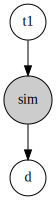

In [5]:
elfi.draw(d)

In [6]:
elfi.Rejection(sim, batch_size=10).sample(10).plot_pairs()

ValueError: Node t1 output must be in a numpy array of length 10 (batch_size).